In [1]:
import urllib.parse
import pandas as pd

In [2]:
MARKET_CODE_DICT = {
    'kospi': 'stockMkt',
    'kosdaq': 'kosdaqMkt',
    'konex': 'konexMkt'
}
DOWNLOAD_URL = 'https://kind.krx.co.kr/corpgeneral/corpList.do'

In [3]:
def zeroFill(columnValue):
    columnValue = str(columnValue)
    outValue = columnValue.zfill(6)
    return outValue

In [4]:
def get_stock_codes(market=None, delisted=False):
    params = {'method': 'download'}

    if market.lower() in MARKET_CODE_DICT:
        ## marketType 키 추가
        params['marketType'] = MARKET_CODE_DICT[market]
        print(market.lower()+" market key is exist")
    else:
        #params['searchType'] = 13
        print("invalid market")

    # make url  key=value & key = value
    params_string = urllib.parse.urlencode(params)
    request_url = DOWNLOAD_URL+"?"+params_string

    df = pd.read_html(request_url, header=0)[0]
    df["종목코드"] = df.종목코드.apply(zeroFill)

    return df

In [6]:
params = {'method': 'download'}

In [13]:
market='kospi'
if market.lower() in MARKET_CODE_DICT:
        ## marketType 키 추가
        params['marketType'] = MARKET_CODE_DICT[market]
        print(market.lower()+" market key is exist")
else:
    #params['searchType'] = 13
    print("invalid market")

kospi market key is exist


In [14]:
params

{'marketType': 'stockMkt', 'method': 'download'}

In [15]:
params_string = urllib.parse.urlencode(params)
params_string

'method=download&marketType=stockMkt'

In [16]:
request_url = DOWNLOAD_URL+"?"+params_string
request_url

'https://kind.krx.co.kr/corpgeneral/corpList.do?method=download&marketType=stockMkt'

In [18]:
df = pd.read_html(request_url, header=0)[0]
df.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,JS전선,5560,절연선 및 케이블 제조업,"선박선,고무선,전력선,통신선 제조",2007-11-12,12월,이익희,http://www.jscable.co.kr,충청남도
1,거북선2호,101380,NaN,운송장비(선박) 임대,2008-04-25,12월,신주선,NaN,부산광역시
2,거북선6호,114140,NaN,NaN,2009-10-01,12월,김연신,NaN,제주특별자치도
3,교보메리츠,64900,NaN,"부동산 투자,운용",2002-01-30,12월,김 상 진,NaN,서울특별시
4,국제관광공사,28780,NaN,NaN,1966-03-18,12월,NaN,NaN,NaN


In [21]:
df["종목코드"] = df.종목코드.apply(zeroFill)
df.head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,JS전선,005560,절연선 및 케이블 제조업,"선박선,고무선,전력선,통신선 제조",2007-11-12,12월,이익희,http://www.jscable.co.kr,충청남도
1,거북선2호,101380,NaN,운송장비(선박) 임대,2008-04-25,12월,신주선,NaN,부산광역시
2,거북선6호,114140,NaN,NaN,2009-10-01,12월,김연신,NaN,제주특별자치도
3,교보메리츠,064900,NaN,"부동산 투자,운용",2002-01-30,12월,김 상 진,NaN,서울특별시
4,국제관광공사,028780,NaN,NaN,1966-03-18,12월,NaN,NaN,NaN


In [30]:
stocks = get_stock_codes('kospi')
stocks.head(2)

kospi market key is exist


,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,JS전선,005560,절연선 및 케이블 제조업,"선박선,고무선,전력선,통신선 제조",2007-11-12,12월,이익희,http://www.jscable.co.kr,충청남도
1,거북선2호,101380,NaN,운송장비(선박) 임대,2008-04-25,12월,신주선,NaN,부산광역시


In [28]:
myStock = input("Enter a stock_name: ")

Enter a stock_name: CJ제일제당


In [31]:
stock_codeDF= stocks[(stocks.회사명==myStock)][['회사명','종목코드']]
stock_codeDF

,회사명,종목코드
799,CJ제일제당,097950


In [33]:
stock_code = stock_codeDF.iloc[0]['종목코드']
stock_name = stock_codeDF.iloc[0]['회사명']
print(stock_name)
print(stock_code)

CJ제일제당
097950


In [34]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [35]:
#font setting for window
#font setting for mac (AppleGothic)
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9) 

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

Populating the interactive namespace from numpy and matplotlib


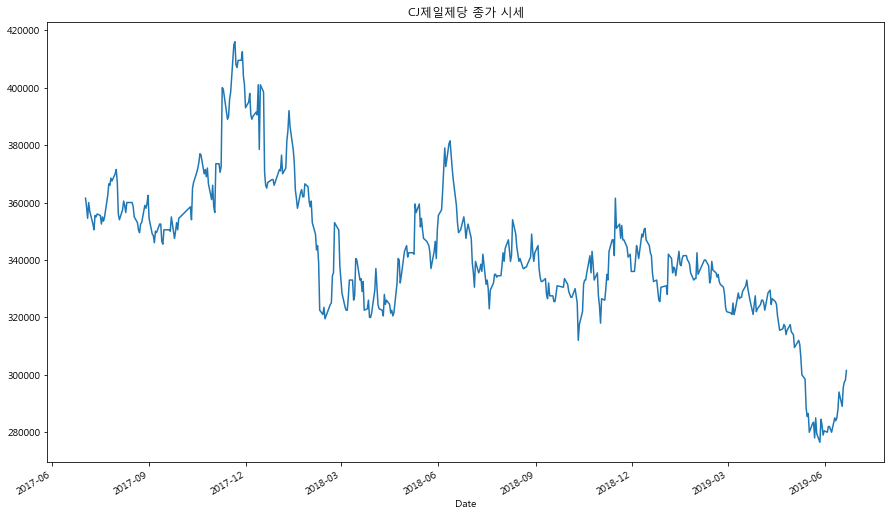

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-06-17,294000,294000,288500,289000,29117,-0.017007
2019-06-18,289500,295500,289500,295500,32169,0.022491
2019-06-19,295000,299500,292500,297500,36179,0.006768
2019-06-20,296000,298500,296000,298000,26386,0.001681
2019-06-21,296500,301500,296000,301500,37788,0.011745


In [36]:
end = date.today()
start = date.today() - timedelta(720)

SEC = web.DataReader(stock_code, start, end)
SEC['Close'].plot(style='-')
plt.title(stock_name+" 종가 시세")
plt.show()

SEC.tail()

In [37]:
# 최근 데이터부터 5일 전까지의 CLOSE평균 (이동평균)
SEC['MA_5']=SEC['Close'].rolling(window=5).mean()
# 최근 데이터부터 20일 전까지의 CLOSE평균 (이동평균)
SEC['MA_20']=SEC['Close'].rolling(window=20).mean()
SEC['diff']=SEC['MA_5']-SEC['MA_20']
SEC.tail(5)

,Open,High,Low,Close,Volume,Change,MA_5,MA_20,diff
Date,,,,,,,,,
2019-06-17,294000,294000,288500,289000,29117,-0.017007,288000.0,283050.0,4950.0
2019-06-18,289500,295500,289500,295500,32169,0.022491,290300.0,283675.0,6625.0
2019-06-19,295000,299500,292500,297500,36179,0.006768,292800.0,284375.0,8425.0
2019-06-20,296000,298500,296000,298000,26386,0.001681,294800.0,285375.0,9425.0
2019-06-21,296500,301500,296000,301500,37788,0.011745,296300.0,286200.0,10100.0


In [38]:
SEC.dtypes

Open        int64
High        int64
Low         int64
Close       int64
Volume      int64
Change    float64
MA_5      float64
MA_20     float64
diff      float64
dtype: object

In [39]:
# plot index
plot_end = date.today()
plot_start = date.today() - timedelta(120) 
SEC = SEC[plot_start:plot_end]

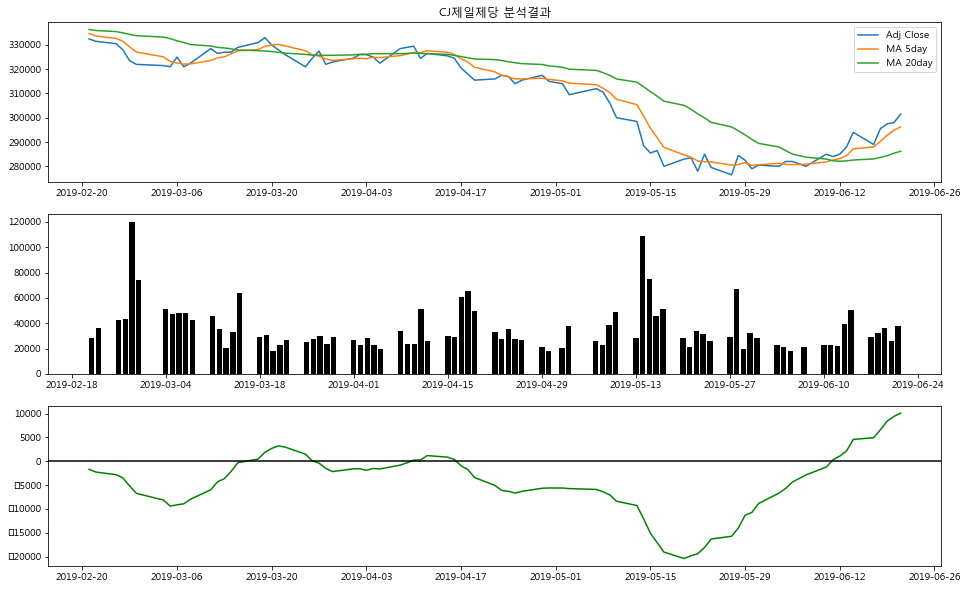

In [45]:
plt.figure(figsize = (16,10))

#price (가격)
plt.subplot(311)    # 3행 중 1열1행
plt.plot(SEC.index, SEC['Close'], label = 'Adj Close')
plt.plot(SEC.index, SEC['MA_5'], label='MA 5day')
plt.plot(SEC.index, SEC['MA_20'], label='MA 20day')
plt.title(stock_name+" 분석결과")
plt.legend(loc='best')

# volume (거래량)
plt.subplot(312)     #3행 중 1열2행
plt.bar(SEC.index, SEC['Volume'], color='black')

#  이동평균 차이 (diff)
diffChart = plt.subplot(313)   #3행 중 1열3행
diffChart.plot(SEC.index, SEC['diff'].fillna(0), color='g')
plt.axhline(y=0, color='k')

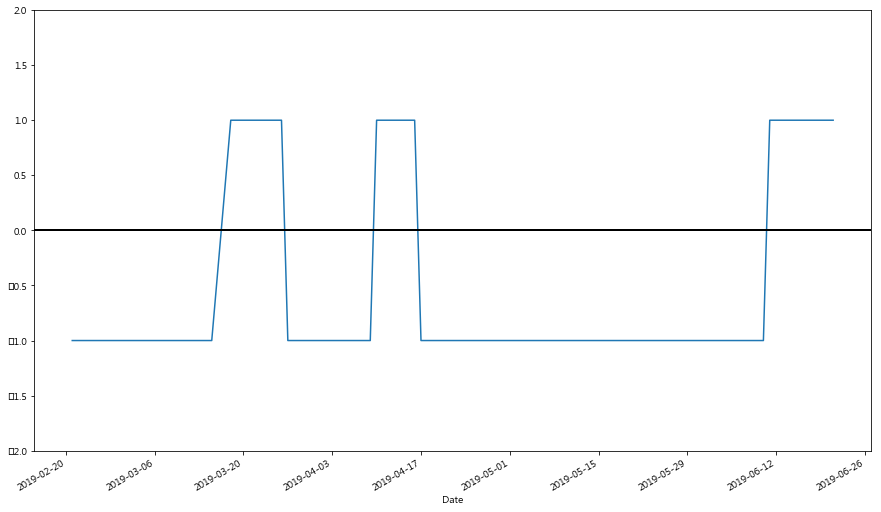

In [41]:
# np.where() is a vectorized if-else function, where a condition is checked for each component of a vector, and the first argument passed is used when the condition holds, and the other passed if it does not
SEC["Regime"] = np.where(SEC['diff'] > 0, 1, 0)
# We have 1's for bullish regimes and 0's for everything else. Below I replace bearish regimes's values with -1, and to maintain the rest of the vector, the second argument is apple["Regime"]
SEC["Regime"] = np.where(SEC['diff'] < 0, -1, SEC["Regime"])
SEC.loc[start:end,"Regime"].plot(ylim = (-2,2)).axhline(y = 0, color = "black", lw = 2)